# Survival

In [2]:
source(here::here("scripts/init.R"))

In [3]:
feats_tidy <- get_all_features() %>% 
    select(-immune, -caf) %>% 
    rename(Immune = immune.meth, CAF = caf.meth, Clock = clock) %>% 
    gather("feat", "score", -ER, -samp) %>%
    mutate(feat = factor(feat, levels = c("CAF", "Immune", "Clock", "MG", "ML")))

In [4]:
surv_df <- survival %>%
        select(-ER) %>%
        left_join(feats_tidy, by = "samp") %>%
        filter(ER != "normal") %>% 
        group_by(ER, feat) %>%
        filter(sum(!is.na(score)) >= 1) %>%
        mutate(score = cut(score, breaks = quantile(score, 0:3 / 3, na.rm = TRUE), labels = c("low", "mid", "high"), include.lowest = TRUE)) %>%
        ungroup() %>% 
        filter(score != "mid") %>%
        mutate(score = factor(score, levels = c("low", "high")))

surv_df %>% count(feat, ER, score)

feat,ER,score,n
<fct>,<chr>,<fct>,<int>
CAF,ER-,low,104
CAF,ER-,high,103
CAF,ER+,low,370
CAF,ER+,high,369
Immune,ER-,low,104
Immune,ER-,high,103
Immune,ER+,low,370
Immune,ER+,high,369
Clock,ER-,low,104


In [5]:
surv_df %>% count(feat, ER)

feat,ER,n
<fct>,<chr>,<int>
CAF,ER-,207
CAF,ER+,739
Immune,ER-,207
Immune,ER+,739
Clock,ER-,207
Clock,ER+,739
MG,ER-,207
MG,ER+,739
ML,ER-,207


#### Figure 4D

Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 10”
Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 10”


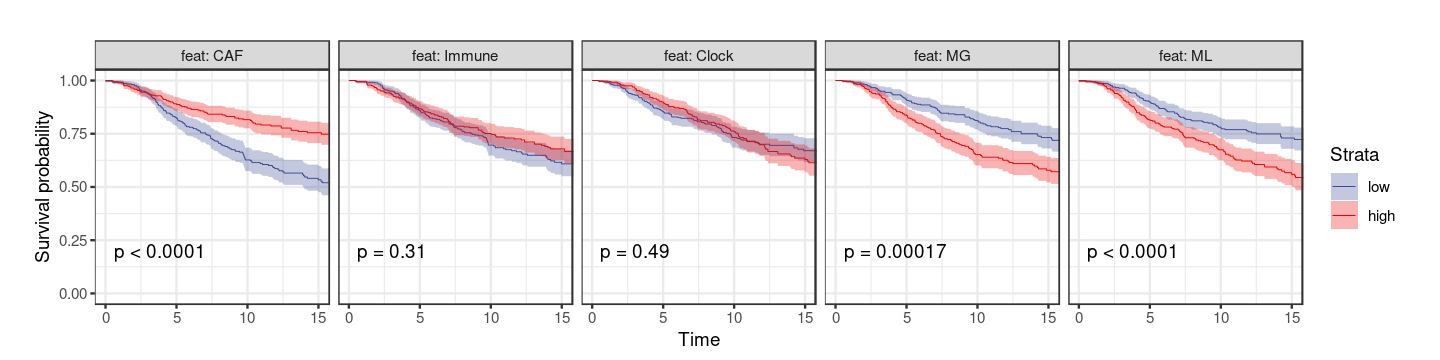

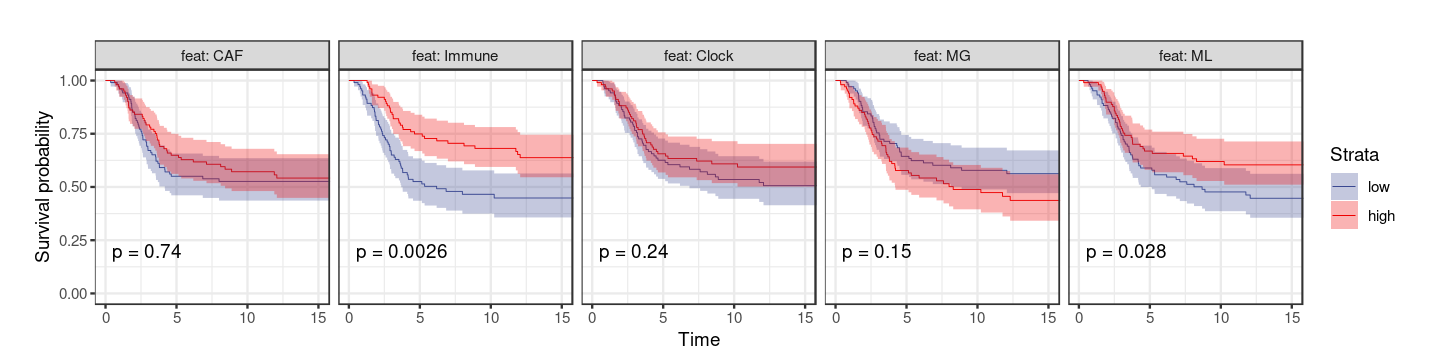

In [6]:
options(repr.plot.width = 12, repr.plot.height = 3)

p_surv_pos <- surv_df %>%
        filter(ER == "ER+") %>%
        plot_km("score", facet.by = "feat", ggtheme = theme_arial(6), time_breaks = 5, legend = "none", censor.size = 3, colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE, size=0.2) + theme(aspect.ratio = 1)

p_surv_neg <- surv_df %>%
        filter(ER == "ER-") %>%
        plot_km("score", facet.by = "feat", ggtheme = theme_arial(6), time_breaks = 5, legend = "none", colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE, size=0.2) + theme(aspect.ratio = 1)

p_surv_pos + theme_bw() + theme(aspect.ratio=1)
p_surv_neg + theme_bw() + theme(aspect.ratio=1)

In [7]:
surv_df %>% group_by(feat, ER, score) %>% summarise(n_death = sum(y < 5 & death == 1), n_surv = sum(y >= 5), n = n_surv + n_death, surv = n_surv / n, surv_p = scales::percent(surv))  %>% as.data.frame

feat,ER,score,n_death,n_surv,n,surv,surv_p
<fct>,<chr>,<fct>,<int>,<int>,<int>,<dbl>,<chr>
CAF,ER-,low,45,51,96,0.5312500,53%
CAF,ER-,high,35,63,98,0.6428571,64%
CAF,ER+,low,61,277,338,0.8195266,82%
CAF,ER+,high,39,302,341,0.8856305,89%
Immune,ER-,low,47,47,94,0.5000000,50%
Immune,ER-,high,25,71,96,0.7395833,74%
Immune,ER+,low,49,289,338,0.8550296,86%
Immune,ER+,high,47,293,340,0.8617647,86%
Clock,ER-,low,38,60,98,0.6122449,61%


In [8]:
df <- surv_df %>% filter(ER == "ER+", feat == "MG")
survival::survdiff(survival::Surv(df$y, df$death) ~ score, data = as.data.frame(df))

df <- surv_df %>% filter(ER == "ER-", feat == "MG")
survival::survdiff(survival::Surv(df$y, df$death) ~ score, data = as.data.frame(df))


Call:
survival::survdiff(formula = survival::Surv(df$y, df$death) ~ 
    score, data = as.data.frame(df))

             N Observed Expected (O-E)^2/E (O-E)^2/V
score=low  370       95      123      6.55      14.1
score=high 369      136      108      7.51      14.1

 Chisq= 14.1  on 1 degrees of freedom, p= 0.0002 

Call:
survival::survdiff(formula = survival::Surv(df$y, df$death) ~ 
    score, data = as.data.frame(df))

             N Observed Expected (O-E)^2/E (O-E)^2/V
score=low  104       44     51.1     0.977      2.12
score=high 103       51     43.9     1.136      2.12

 Chisq= 2.1  on 1 degrees of freedom, p= 0.1 

In [9]:
df <- surv_df %>% filter(ER == "ER+", feat == "MG")
survival::coxph(survival::Surv(df$y, df$death) ~ score, data = as.data.frame(df))

df <- surv_df %>% filter(ER == "ER-", feat == "MG")
survival::coxph(survival::Surv(df$y, df$death) ~ score, data = as.data.frame(df))

Call:
survival::coxph(formula = survival::Surv(df$y, df$death) ~ score, 
    data = as.data.frame(df))

            coef exp(coef) se(coef)     z        p
scorehigh 0.4998    1.6484   0.1343 3.722 0.000198

Likelihood ratio test=14.14  on 1 df, p=0.0001699
n= 739, number of events= 231 

Call:
survival::coxph(formula = survival::Surv(df$y, df$death) ~ score, 
    data = as.data.frame(df))

            coef exp(coef) se(coef)     z     p
scorehigh 0.2988    1.3483   0.2060 1.451 0.147

Likelihood ratio test=2.11  on 1 df, p=0.1461
n= 207, number of events= 95 

#### Extended Data Figure 10D

Joining, by = "samp"

Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 20”


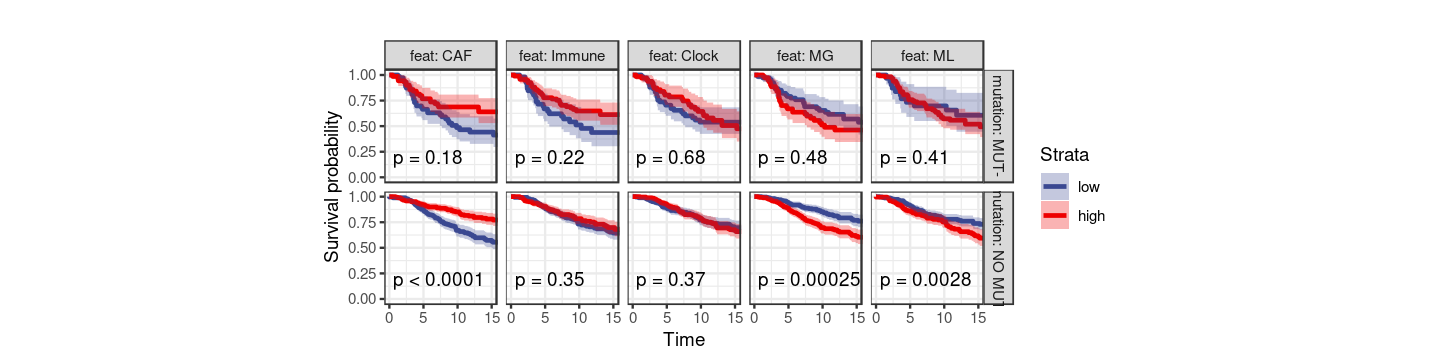

In [10]:
df <- survival %>%
        select(-ER) %>%
        left_join(feats_tidy, by = "samp") %>%
        filter(ER != "normal") %>% 
        left_join(get_mut_df() %>%
            filter(gene == "TP53") %>%
            filter(!is.na(mutation)) %>%
            select(samp, gene, mutation)) %>%        
        filter(ER == "ER+", !is.na(mutation)) 
p_surv_p53 <- df %>%
        group_by(ER, feat) %>%
        filter(sum(!is.na(score)) >= 1) %>%
        mutate(score = cut(score, breaks = quantile(score, 0:3 / 3, na.rm = TRUE), labels = c("low", "mid", "high"), include.lowest = TRUE)) %>%
        ungroup() %>% 
        filter(score != "mid") %>%
        mutate(score = factor(score, levels = c("low", "high"))) %>%
        plot_km("score", facet.by = c("mutation", "feat"), ggtheme = theme_arial(6), time_breaks = 5, legend = "none", censor.size = 3, colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE) + theme(aspect.ratio = 1)

p_surv_p53 + theme_bw() + theme(aspect.ratio=1)



In [11]:
df %>% distinct(samp, ER, mutation) %>% count(mutation)

mutation,n
<chr>,<int>
MUT-,202
NO MUT,824


### Raw-methylation 

In [12]:
feats_tidy <- get_all_features_raw() %>% 
    select(-immune, -caf) %>% 
    rename(Immune = immune.meth, CAF = caf.meth, Clock = clock) %>% 
    gather("feat", "score", -ER, -samp) %>%
    mutate(feat = factor(feat, levels = c("CAF", "Immune", "Clock", "MG", "ML")))

In [13]:
surv_df <- survival %>%
        select(-ER) %>%
        left_join(feats_tidy, by = "samp") %>%
        filter(ER != "normal") %>% 
        group_by(ER, feat) %>%
        filter(sum(!is.na(score)) >= 1) %>%
        mutate(score = cut(score, breaks = quantile(score, 0:3 / 3, na.rm = TRUE), labels = c("low", "mid", "high"), include.lowest = TRUE)) %>%
        ungroup() %>%
        filter(score != "mid") %>%
        mutate(score = factor(score, levels = c("low", "high")))

surv_df %>% count(feat, ER, score)

feat,ER,score,n
<fct>,<chr>,<fct>,<int>
CAF,ER-,low,104
CAF,ER-,high,103
CAF,ER+,low,370
CAF,ER+,high,369
Immune,ER-,low,104
Immune,ER-,high,103
Immune,ER+,low,370
Immune,ER+,high,369
Clock,ER-,low,104


Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 10”
Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 10”


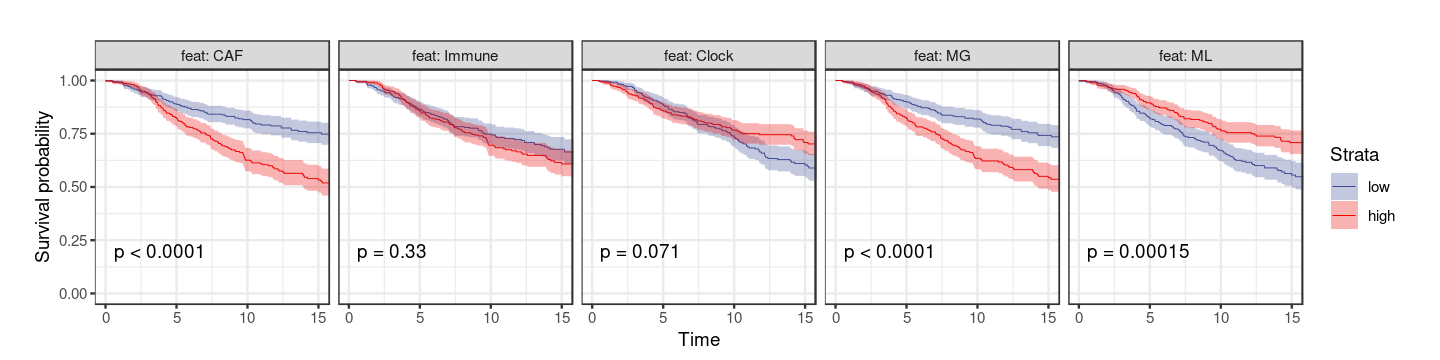

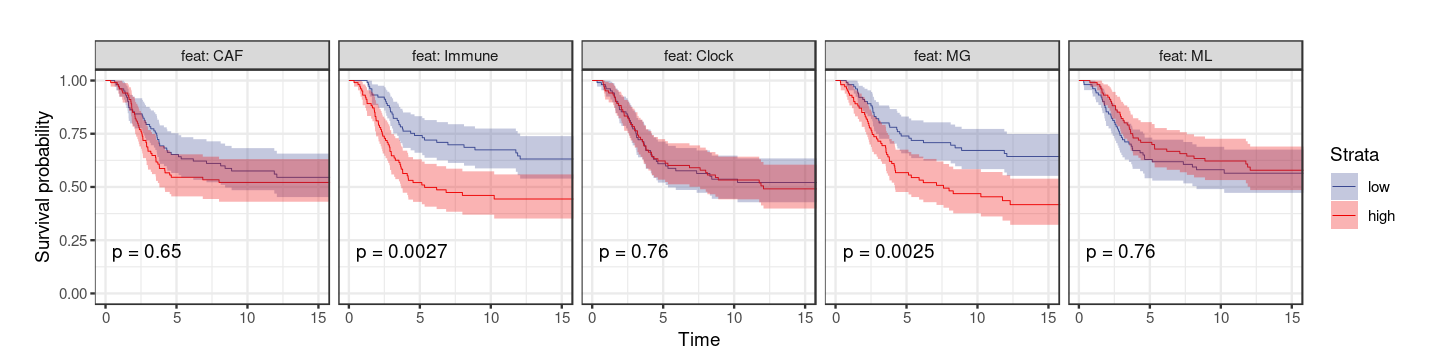

In [14]:
options(repr.plot.width = 12, repr.plot.height = 3)

p_surv_pos <- surv_df %>%
        filter(ER == "ER+") %>%
        plot_km("score", facet.by = "feat", ggtheme = theme_arial(6), time_breaks = 5, legend = "none", censor.size = 3, colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE, size=0.2) + theme(aspect.ratio = 1)

p_surv_neg <- surv_df %>%
        filter(ER == "ER-") %>%
        plot_km("score", facet.by = "feat", ggtheme = theme_arial(6), time_breaks = 5, legend = "none", colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE, size=0.2) + theme(aspect.ratio = 1)

p_surv_pos + theme_bw() + theme(aspect.ratio=1)
p_surv_neg + theme_bw() + theme(aspect.ratio=1)

Joining, by = "samp"

Warning message in (function (survsummary, times, survtable = c("cumevents", "risk.table", :
“The length of legend.labs should be 20”


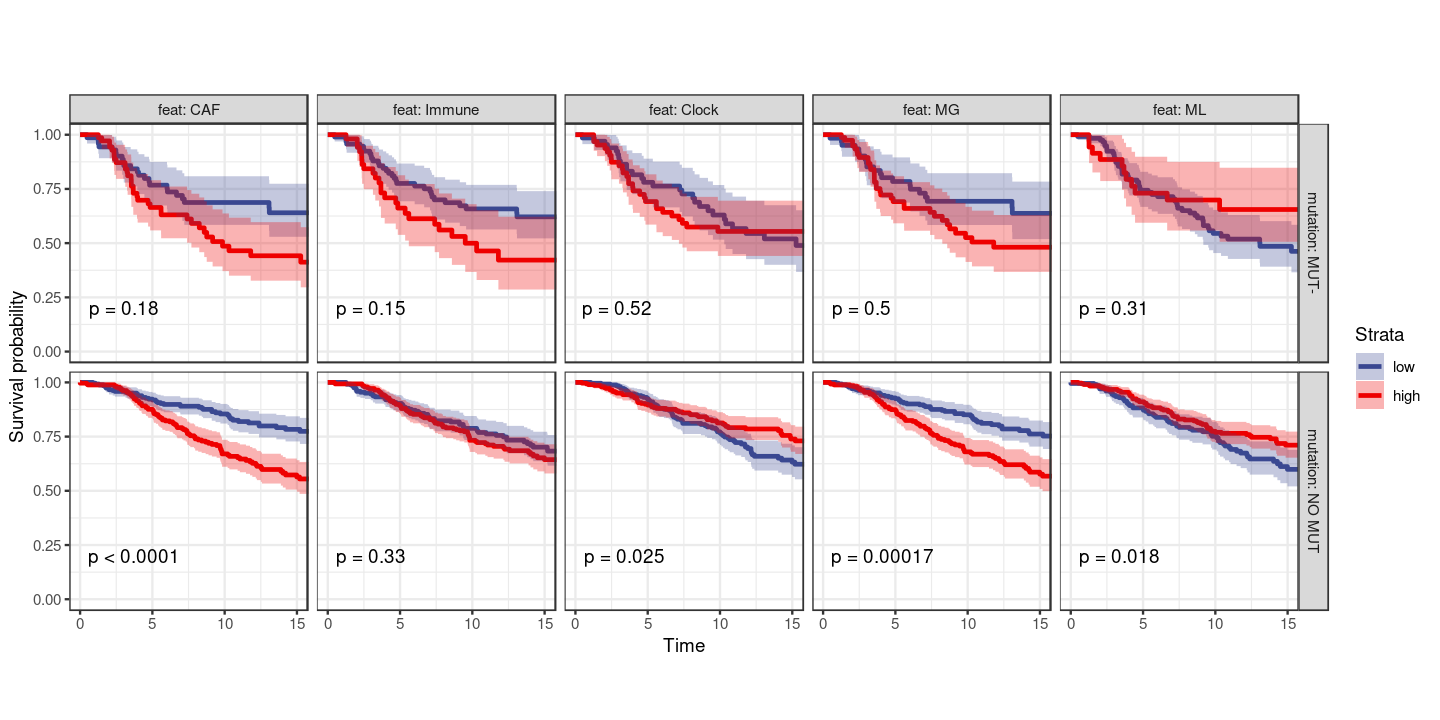

In [15]:
options(repr.plot.width = 12, repr.plot.height = 6)
surv_df_p53 <- surv_df %>%
        left_join(get_mut_df() %>%
            filter(gene == "TP53") %>%
            filter(!is.na(mutation)) %>%
            select(samp, gene, mutation)) %>% 
            filter(!is.na(mutation))
p_surv_p53 <- surv_df_p53 %>%        
        filter(ER == "ER+") %>%
        plot_km("score", facet.by = c("mutation", "feat"), ggtheme = theme_arial(6), time_breaks = 5, legend = "none", censor.size = 3, colors = "aaas", time_range = c(0, 15), nrow = 1, censor = FALSE, pval = TRUE) + theme(aspect.ratio = 1)

p_surv_p53 + theme_bw() + theme(aspect.ratio=1)